
The main objective of this notebook is to analyze and model data related to laptop prices in Indonesia using the dataset `laptop_price_idr.csv`. The final goal is to predict the price of a laptop based on specific user-defined specifications. Here's the complete thought process:

1. **Import Necessary Libraries**  
   Begin by importing essential Python libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and relevant machine learning libraries from `sklearn`.

2. **Load the Dataset**  
   Load the dataset into a pandas DataFrame for processing, and create a backup copy to preserve the original data.

3. **Understand the Dataset**  
   Explore the structure of the dataset using `.head()`, `.info()`, `.describe()`, and value counts of categorical columns to gain insight into data distributions.

4. **Data Cleaning**  
   Handle missing values, remove duplicates, correct data types, and clean specific columns (e.g., extract numeric values from strings like "GB" or "GHz").

5. **Exploratory Data Analysis (EDA)**  
   Visualize distributions, identify correlations, and analyze how features like brand, RAM, processor, GPU, and screen size affect laptop prices.

6. **Feature Engineering**  
   Transform or extract features (e.g., binary columns for touchscreen/IPS, numeric conversions for memory/storage, dummy variables for categorical features).

7. **Model Building**  
   Use regression algorithms (e.g., `RandomForestRegressor`) to build a predictive model. Split the data into training and testing sets and evaluate model performance using R², MAE, and RMSE.

8. **Final Business Prediction**  
   Using the trained model, predict the price of a laptop with the following specifications:
   - Brand: Dell
   - Type: Notebook
   - Screen Size: 17.3 inches
   - Resolution: Full HD 1920x1080
   - Processor: Intel Core i7 8550U 1.8GHz
   - Memory: 16GB RAM
   - Storage: 512GB SSD
   - Graphics: AMD Radeon 530
   - Operating System: Linux Mint

9. **Conclusion**  
   Summarize the insights from the analysis and performance of the model, and present the predicted price with context on how confident the model is based on the data distribution.



### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_csv("laptop_price_idr.csv")
df1=df.copy()

### To see the first 5 rows of data

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"13,883,153.88"
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"9,315,679.26"
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"5,958,702.00"
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"26,295,492.85"
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"18,690,634.66"


### To delete column "unnamed"

In [4]:
df=df.drop('Unnamed: 0', axis = 'columns')

### Check if the data have missing values

In [5]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_IDR           0
dtype: int64

In [6]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"13,883,153.88"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"9,315,679.26"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"5,958,702.00"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"26,295,492.85"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"18,690,634.66"
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,"6,611,568.48"
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,"15,534,077.04"
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,"2,373,117.84"
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,"7,917,301.44"


### Check duplicates of the data

In [7]:
df.duplicated().sum()

29

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_IDR         1303 non-null   object 
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


### Delete rows with duplicate values

In [9]:
df=df.drop_duplicates()

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"13,883,153.88"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"9,315,679.26"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"5,958,702.00"
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"26,295,492.85"
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"18,690,634.66"


### Cleaning the data

In [11]:
# To missing sentence "GB,Kg,(,)"
df['Ram'] = df['Ram'].apply(lambda x:x.replace('GB',''))
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))
df['Price'] = df['Price_IDR'].str.replace(',', '').astype(float)

# Change the type of the data
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

<ipython-input-11-b2f538c4cd1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].apply(lambda x:x.replace('GB',''))
<ipython-input-11-b2f538c4cd1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))
<ipython-input-11-b2f538c4cd1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price_IDR         1274 non-null   object 
 11  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 119.4+ KB


### Round the price so it has no decimal places

In [13]:
df['Price'] = df['Price'].apply(round)

<ipython-input-13-10493b727c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].apply(round)


### To check and visualize the frequency of each category in the TypeName column

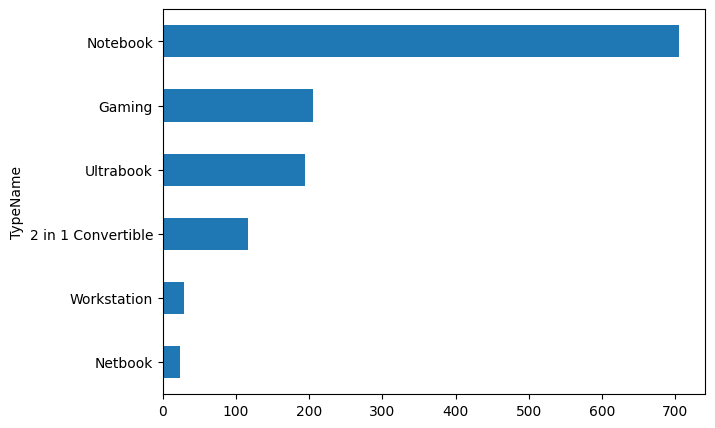

In [14]:
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(7,5))
plt.show()


### To display a pie chart showing the distribution of the top 10 most frequent companies in the Company column.

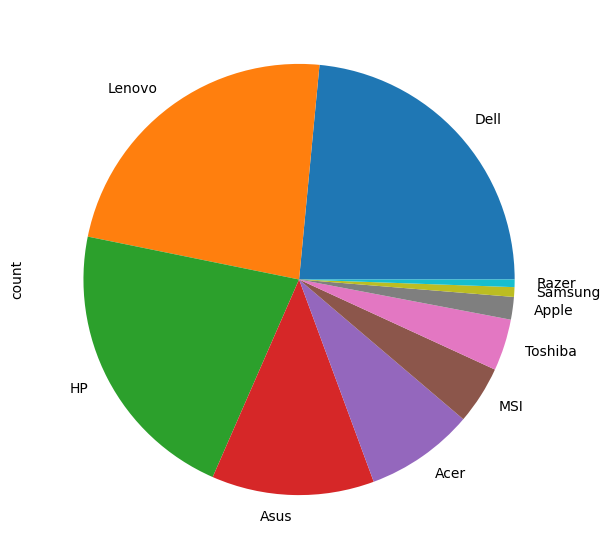

In [15]:
plt.figure(figsize=(10,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show()

### To display a horizontal bar chart showing the distribution of companies in the Company column, sorted from the least frequent to the most frequent


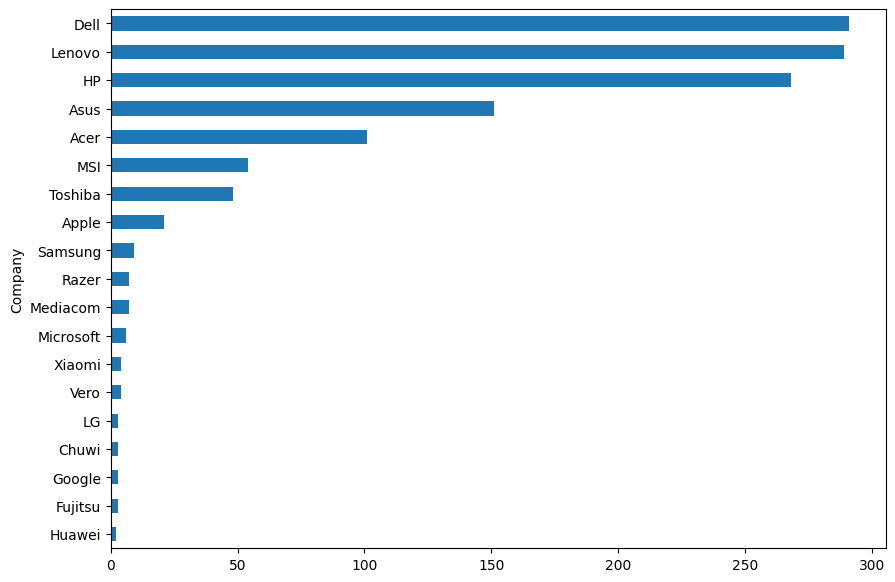

In [16]:
df['Company'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()


### To visualize the distribution of laptop weights using a histogram, highlighting the underlying data density.

<ipython-input-17-c7c290d3bf8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


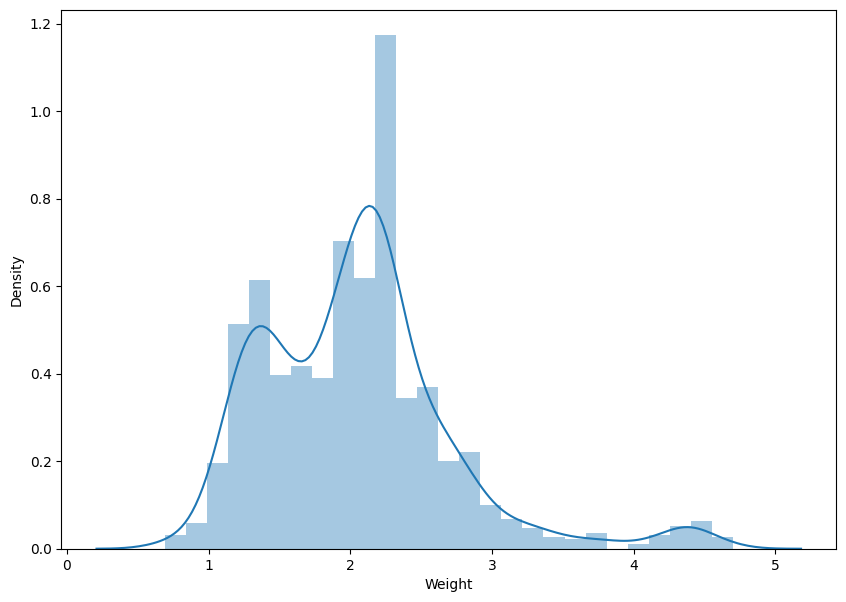

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(df['Weight'])
plt.show()

The distribution with two main peaks, One around 1.3–1.5 kg (lighter laptops, e.g., ultrabooks) another around 2.0–2.3 kg (standard-sized laptops). There are fewer laptops that weigh more than 3 kg, though a small third peak appears around 4.5 kg, likely representing heavy-duty laptops or workstations. The distribution is slightly right-skewed, indicating a majority of laptops are lighter, but there are some heavier outliers.

### To visualize the distribution of laptop prices using a histogram with 50 bins

<ipython-input-18-4a1aec20b069>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins = 50)


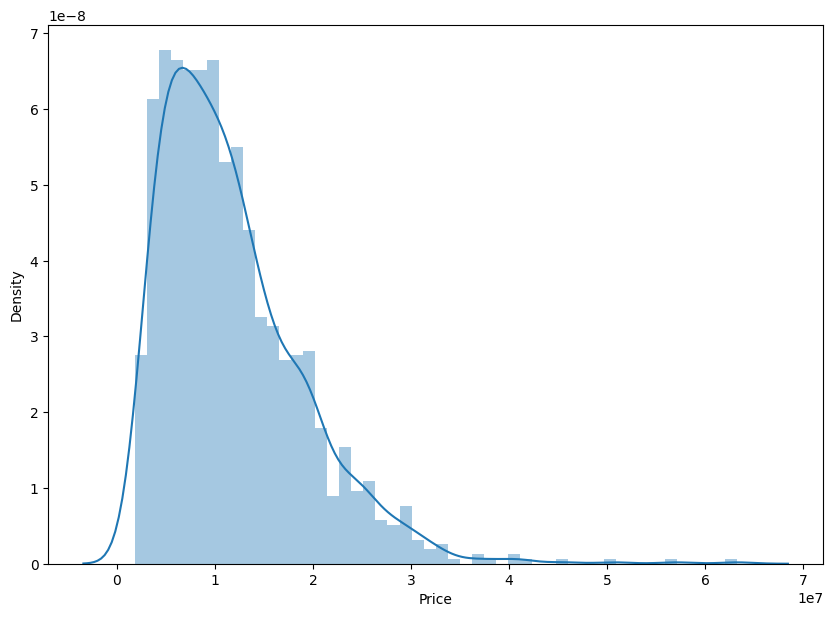

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(df['Price'],bins = 50)
plt.show()

Interpretation:

The distribution of prices is right-skewed (positively skewed), meaning most laptops are clustered at lower prices, with fewer laptops priced very high. The highest density occurs around 7–10 million (as seen from the peak of the curve), suggesting this is the most common price range. The long tail on the right indicates a few high-end laptops priced up to 60 million.

### To display the average laptop price for each TypeName category using a vertical bar chart. 

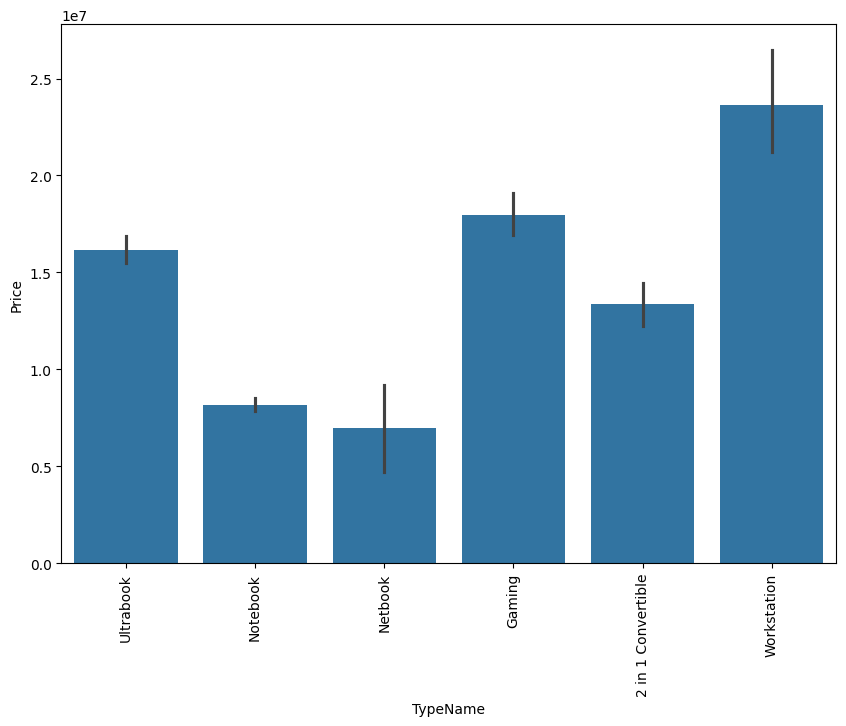

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

Workstations have the highest average price, followed by Gaming laptops and Ultrabooks. This is expected, as these types usually offer high performance and specialized hardware. Netbooks and Notebooks are the least expensive, indicating they are more budget-friendly and likely used for basic tasks. 2 in 1 Convertibles fall in the mid-price range. Error bars for Netbooks and Workstations are relatively larger, suggesting greater price variability within those categories.

### To visualize the average laptop price for each company using a vertical bar chart, with company names rotated vertically for readability.

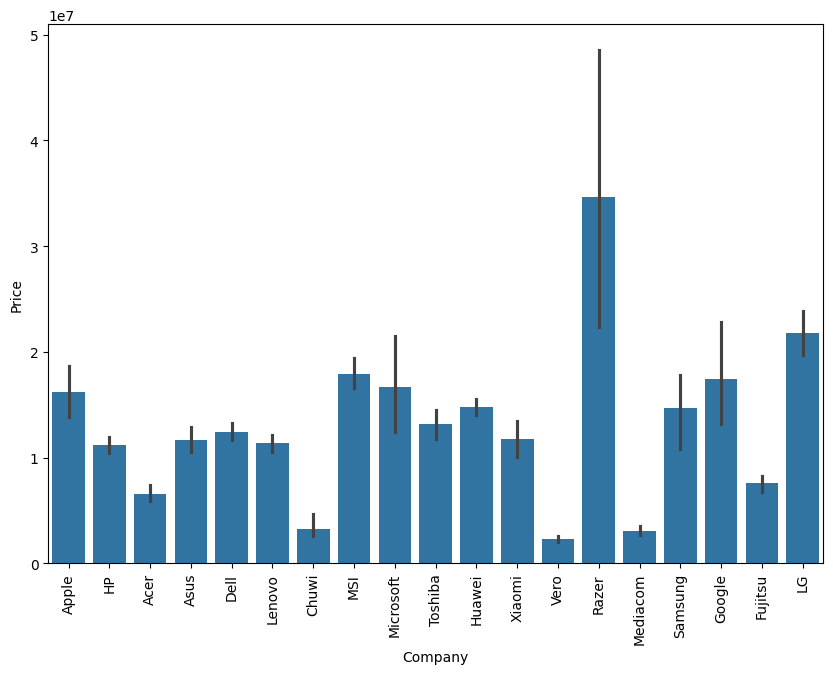

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

Razer has the highest average laptop price, with a large error bar indicating high price variability, possibly due to a mix of premium gaming models. LG and Microsoft also show high average prices, suggesting their models target the upper-mid to premium market. Chuwi, Vero, and Mediacom have the lowest average prices, likely offering budget or entry-level laptops. Apple maintains a high average price, consistent with its premium branding. Most other brands (e.g., HP, Dell, Asus, Lenovo, Huawei) fall into the mid-price range, balancing performance and affordability.

### To display a horizontal bar chart showing the distribution of different RAM sizes, sorted from the least to the most frequent.

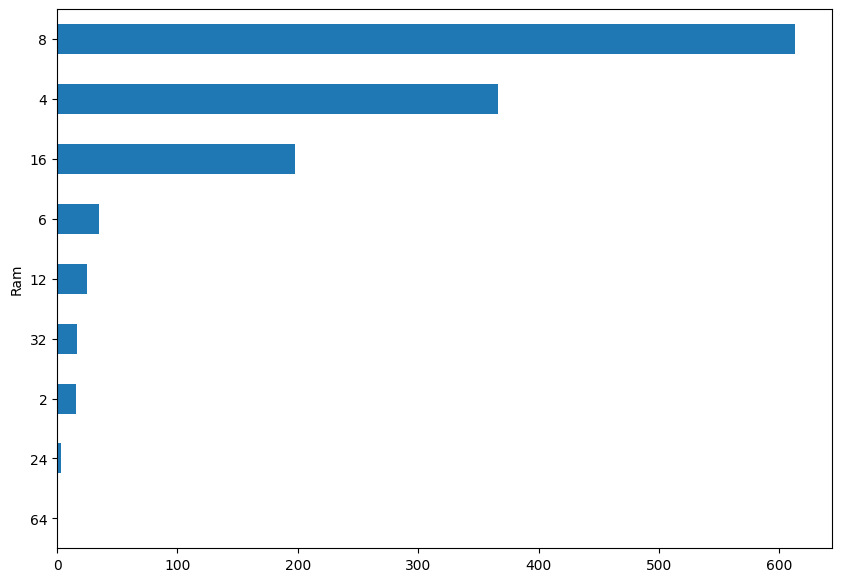

In [21]:
df['Ram'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

Interpretation:

8 GB RAM is the most common configuration, followed by 4 GB and 16 GB, indicating these are the mainstream options for laptops. Lower frequencies are observed for unusual or less common RAM sizes like 6 GB, 12 GB, 32 GB, 2 GB, 24 GB, and 64 GB. 64 GB and 24 GB RAM laptops are very rare, likely representing high-end or specialized devices (e.g., workstations or server-grade laptops).

### To visualize the average laptop price for each RAM size using a vertical bar chart, with RAM labels rotated vertically for better readability.

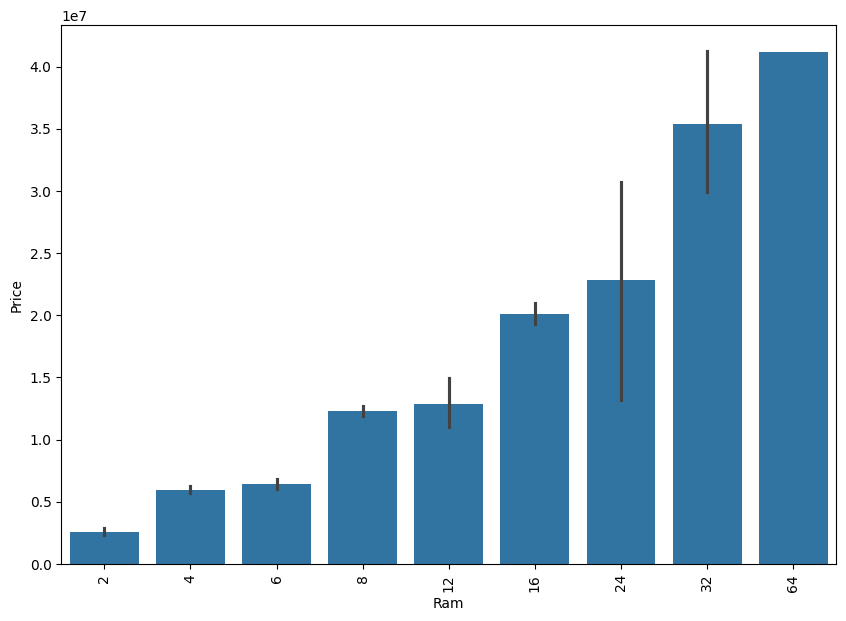

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

The price of laptops generally increases with RAM size, which is expected as higher RAM often correlates with higher performance. Laptops with 64 GB and 32 GB RAM are the most expensive, suggesting these are high-end or specialized models likely used for tasks such as video editing, 3D rendering, or server-level workloads. Devices with 2 GB, 4 GB, and 6 GB RAM are significantly cheaper, indicating they are likely entry-level options suitable for basic tasks. The price variability is also larger for higher RAM configurations like 24 GB and 32 GB, implying a broader range of models or use-cases within that segment.

In [23]:
 df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<ipython-input-23-6d4aa4217922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


### Analyzing whether the laptop has a touch screen 1(touchscreen) 0(nor)

In [24]:
df['Touchscreen'].value_counts()

Touchscreen
0    1086
1     188
Name: count, dtype: int64

### To compare the average laptop prices between touchscreen and non-touchscreen models using a bar chart

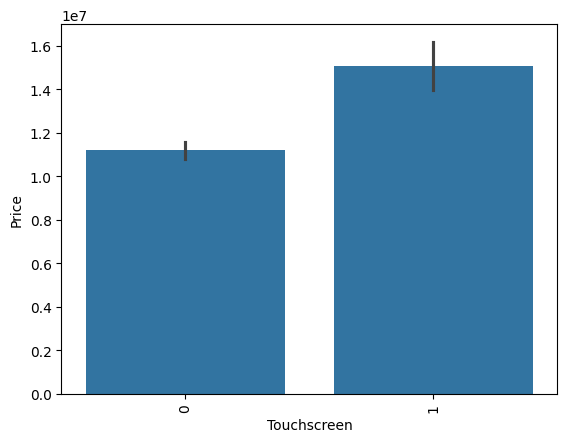

In [25]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:
Touchscreen laptops (represented by 1) have a higher average price than non-touchscreen laptops (0). The price difference is visibly significant, and the error bars (likely standard error) do not overlap, indicating that the difference is likely statistically meaningful. This reflects the general market trend where touchscreen functionality adds cost due to added technology and often higher-end features.

In [26]:
for i in df['ScreenResolution'].sample(5):
    print(i)

Full HD 1920x1080
Full HD 1920x1080
IPS Panel Full HD 1920x1080
Full HD / Touchscreen 1920x1080
Full HD 1920x1080


### Analyzing laptops that have IPS displays

In [27]:
df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<ipython-input-27-e8be09197a29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


In [28]:
df['ips'].value_counts()

ips
0    917
1    357
Name: count, dtype: int64

### To compare the average laptop prices between models with and without IPS display panels using a bar chart.

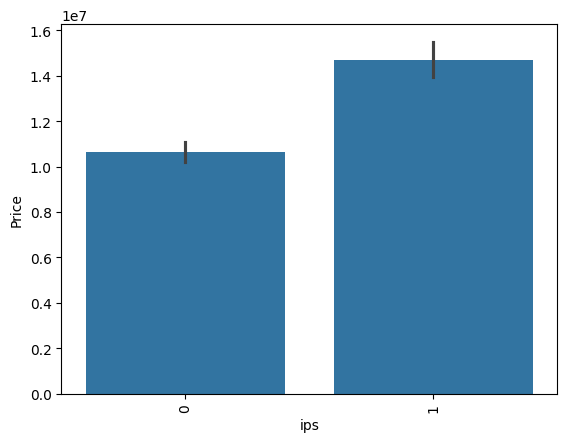

In [29]:
sns.barplot(x=df['ips'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation

The bar chart compares the average laptop prices based on whether they feature an IPS (In-Plane Switching) display:

Laptops with IPS panels (ips = 1) have a significantly higher average price compared to those without (ips = 0).

This suggests that IPS displays, known for better color accuracy and wider viewing angles, are typically found in higher-end or premium laptops.

The error bars are relatively small, indicating consistent pricing trends within both groups.

In [30]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [31]:
temp = df['ScreenResolution'].str.split('x',n=1,expand = True)

In [32]:
df['xres'] =temp[0]
df['yres'] = temp[1]

<ipython-input-32-e85046e7ab02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xres'] =temp[0]
<ipython-input-32-e85046e7ab02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yres'] = temp[1]


In [33]:
df['xres']=df['xres'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

<ipython-input-33-eda201bb1494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xres']=df['xres'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [34]:
df['xres'] =df['xres'].astype('int')
df['yres']= df['yres'].astype('int')

<ipython-input-34-774d379bed9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xres'] =df['xres'].astype('int')
<ipython-input-34-774d379bed9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yres']= df['yres'].astype('int')


In [35]:
df['ppi'] = (((df['xres']**2)+(df['yres']**2))**0.5/df['Inches']).astype('float')

<ipython-input-35-3674303f92f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppi'] = (((df['xres']**2)+(df['yres']**2))**0.5/df['Inches']).astype('float')


In [36]:
df.drop(columns=['xres','yres'],inplace = True, axis = 'columns')

<ipython-input-36-4c777c084459>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['xres','yres'],inplace = True, axis = 'columns')


In [37]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [38]:
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

<ipython-input-38-78ba844c40ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [39]:
def fetch(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'AMD Processor'

In [40]:
df['Processor brand'] = df['Cpu name'].apply(fetch)
df.head(2)

<ipython-input-40-10ed72a093d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor brand'] = df['Cpu name'].apply(fetch)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR,Price,Touchscreen,ips,ppi,Cpu name,Processor brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,"13,883,153.88",13883154,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,"9,315,679.26",9315679,0,0,127.677940,Intel Core i5,Intel Core i5


In [41]:
df.drop(columns = ['Cpu name'],inplace = True)

<ipython-input-41-eeb82dcdb406>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Cpu name'],inplace = True)


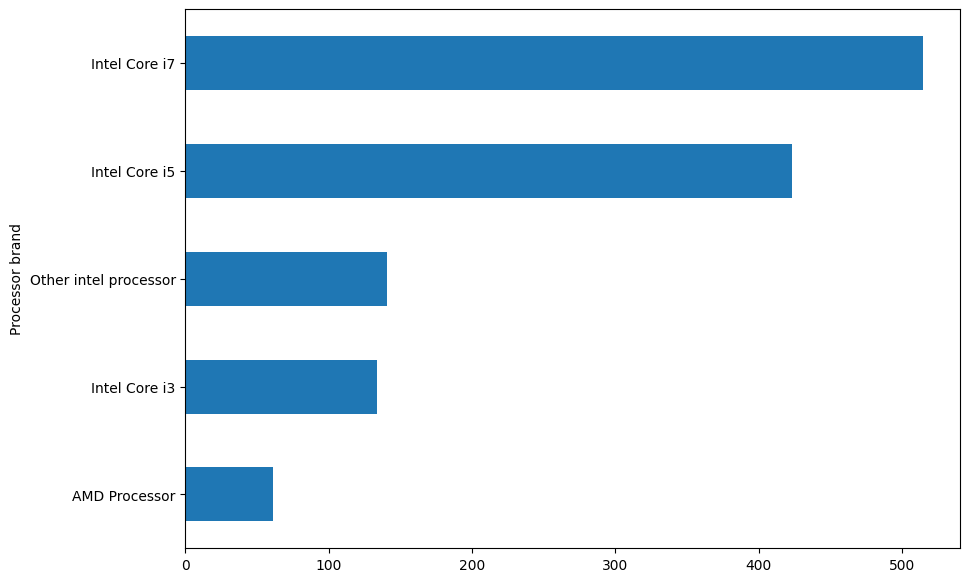

In [42]:
plt.figure(figsize=(10,7))
df['Processor brand'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

Interpretation:

Intel Core i7 is the most common processor found in laptops, followed by Intel Core i5, indicating that these high-performance processors are in high demand, likely due to their suitability for both everyday use and more intensive tasks. Intel Core i3 and other Intel processors are moderately represented, suggesting they cater to more budget-conscious users or specialized use cases. AMD processors appear the least frequently, indicating a lower market share in this dataset or possibly a preference for Intel processors in the laptops analyzed.

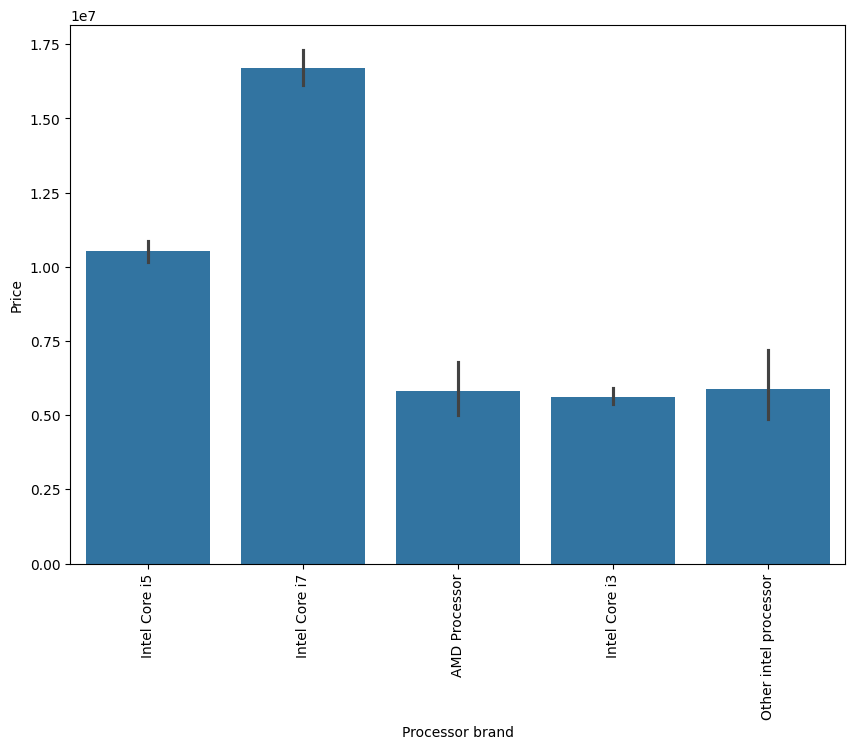

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Processor brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

Laptops with Intel Core i7 processors have the highest average prices, reflecting their positioning in the high-performance segment, suitable for demanding tasks like content creation or software development. Intel Core i5 laptops also command relatively high prices, suggesting a balance between performance and affordability. On the other hand, laptops with AMD processors, Intel Core i3, and other Intel processors tend to have lower average prices, indicating they are more commonly found in budget or entry-level segments. The wider error bars for AMD and 'Other Intel processor' categories suggest more variation in pricing within those groups.

## Cleaning and feature selection "memory" column

In [44]:
# To delete .0 (ex: 128.0 will replace 128)
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# To replace "GB" and "TB"
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
#This line is used to separate Layer 1 and Layer 2 storage from data that is combined in a single string within the Memory column.
new = df["Memory"].str.split("+", n = 1, expand = True)
#Saving the Layer 1 storage into the column called "first"
df["first"]= new[0]
#Removes unwanted spaces to ensure the data in first is clean and consistent.
df["first"]=df["first"].str.strip()
#Layer 2 storage to a new column called second
df["second"]= new[1]

<ipython-input-44-1125a26d0f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
<ipython-input-44-1125a26d0f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Memory"] = df["Memory"].str.replace('GB', '')
<ipython-input-44-1125a26d0f89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [45]:
#This line creates a new column Layer1HDD that indicates whether the first storage layer contains an HDD. It assigns 1 if 'HDD' is found in the first column, otherwise 0.
#(same with row below)
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#Cleans the first column to keep only numeric storage sizes, making it easier to convert to integers or analyze numerically.
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

<ipython-input-45-a8980535a991>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
<ipython-input-45-a8980535a991>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
<ipython-input-45-a8980535a991>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [46]:
#The following code processes the second part of the memory information (Layer 2) using the same logic as Layer 1. 

df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

<ipython-input-46-087f615e8d66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["second"].fillna("0", inplace = True)
<ipython-input-46-087f615e8d66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
<ipython-input-46-087f615e8d66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [47]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,128,0,0,0,0,1,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,256,0,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,512,0,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.20,...,500,0,1,0,0,0,0,0,0,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,...,128,0,0,1,0,0,0,0,0,0
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,...,512,0,0,1,0,0,0,0,0,0
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,...,64,0,0,0,0,1,0,0,0,0


In [48]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

<ipython-input-48-bc974704dfa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["first"] = df["first"].astype(int)
<ipython-input-48-bc974704dfa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["second"] = df["second"].astype(int)
<ipython-input-48-bc974704dfa5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [49]:
df.drop(columns=['second','Layer1SSD','Layer1HDD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-49-e4c6aa02e512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['second','Layer1SSD','Layer1HDD', 'Layer1Hybrid',


In [50]:
df.drop(columns=['Memory'],inplace=True)

<ipython-input-50-8cab1fd6fcc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory'],inplace=True)


In [51]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head(2)

<ipython-input-51-f5660c721608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_IDR,Price,Touchscreen,ips,ppi,Processor brand,first,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,"13,883,153.88",13883154,0,1,226.983005,Intel Core i5,128,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,"9,315,679.26",9315679,0,0,127.677940,Intel Core i5,128,0,0


In [52]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [53]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

<ipython-input-53-c81b5c1ae33f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])


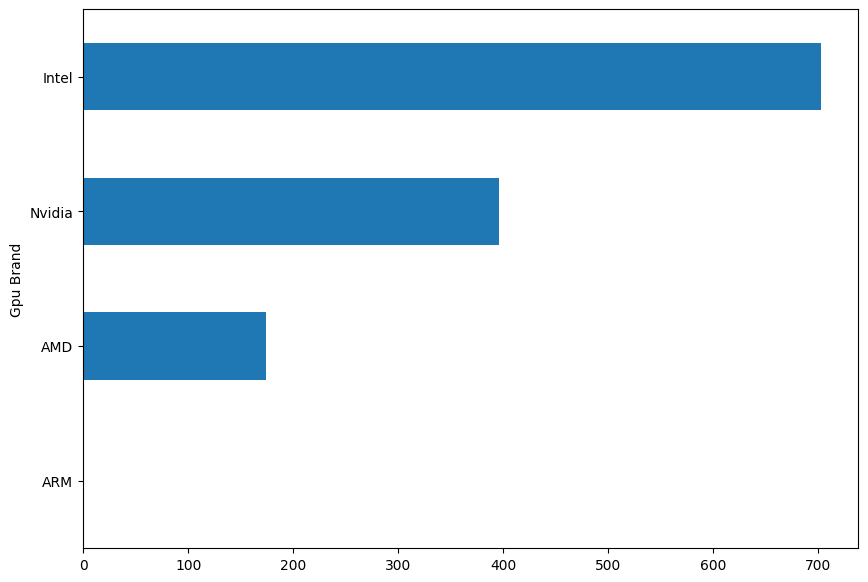

In [54]:
df['Gpu Brand'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,7))
plt.show()

Interpretation:
The chart shows the distribution of laptops based on GPU brand.

Intel is the most common GPU brand, used in the majority of laptops (around 700 units), likely because many laptops rely on Intel's integrated graphics, which are cost-effective and sufficient for general use.

Nvidia comes in second, with around 400 units, reflecting its strong presence in performance-oriented or gaming laptops.

AMD appears in fewer laptops (around 170 units), suggesting a smaller market share or usage primarily in budget and some performance laptops.

ARM GPUs are almost negligible or not represented, indicating either very low adoption in this dataset or usage in niche devices (e.g., tablets, Chromebooks).

In [55]:
df = df[df['Gpu Brand'] != 'ARM']

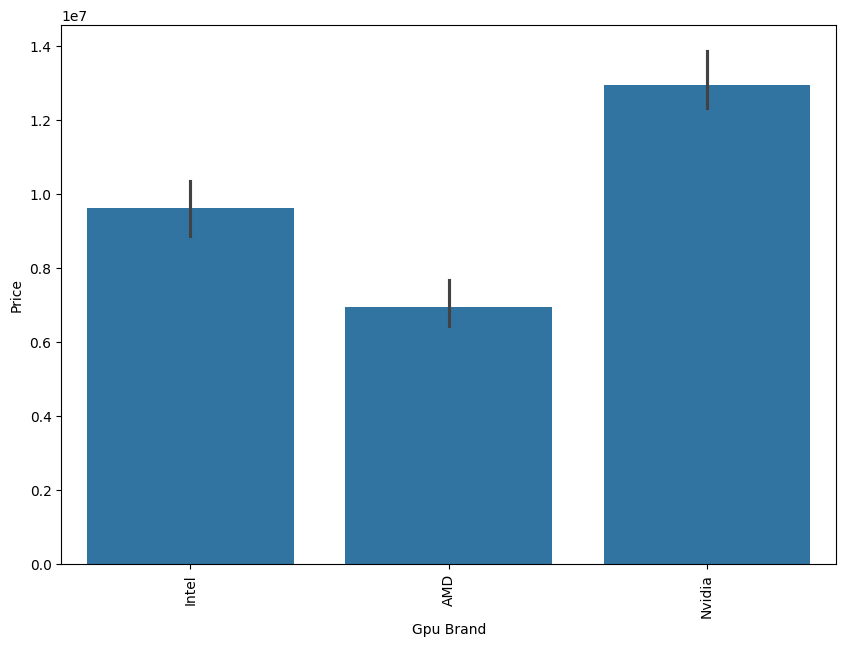

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

Laptops with Nvidia GPUs have the highest average price, followed by those with Intel GPUs, while AMD-powered laptops have the lowest average price among the three categories.

The price difference is clearly visible:

Nvidia laptops average around 13 million, reflecting their positioning in high-performance or gaming segments.

Intel GPU laptops average around 9.5 million, likely indicating more balanced or integrated GPU usage.

AMD laptops average the lowest at around 7 million, often associated with budget or mid-range models.

The error bars, likely representing standard error, are relatively small, especially for AMD and Intel, indicating consistent pricing within those groups. Nvidia has a slightly larger error range, which may reflect the wide range of dedicated GPU models it offers (from mid-tier to high-end).

In [57]:
# df.drop(columns=['Gpu'],inplace = True)

In [58]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

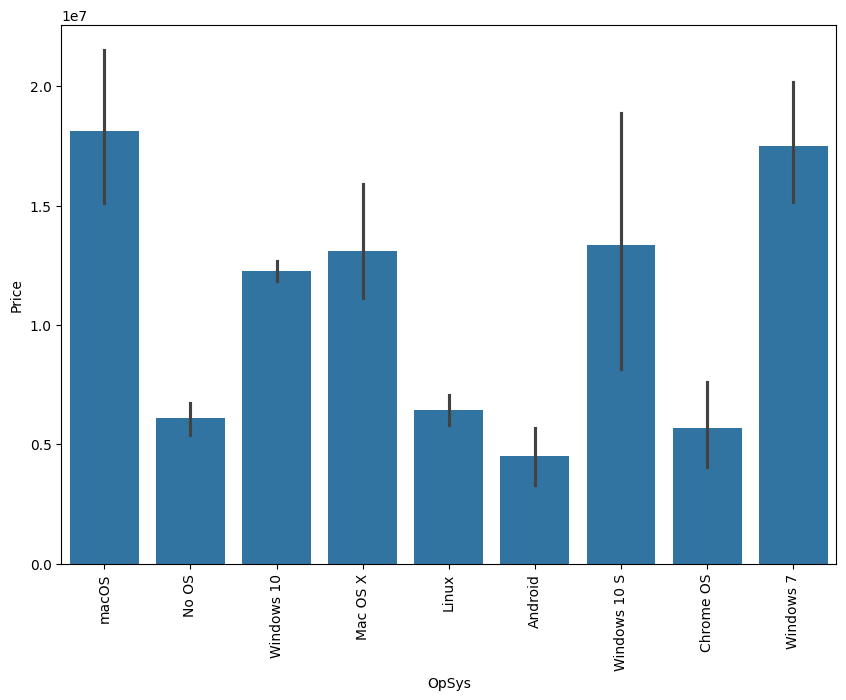

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:

Laptops running macOS and Windows 7 have the highest average prices, indicating that these systems are typically found in premium or specialized models. macOS devices are likely MacBooks, which are known for their high cost. Similarly, the high average price for Windows 7 laptops might reflect legacy professional or enterprise-grade systems still on the market.

Windows 10 and Mac OS X laptops also show relatively high average prices, suggesting they dominate the mid-to-high-end segments. In contrast, laptops with Linux, Chrome OS, Android, or no operating system tend to have significantly lower prices, indicating they are more commonly associated with budget-friendly or entry-level devices.

Notably, systems like 'Windows 10 S' show a wide price range (as indicated by large error bars), implying they are available across a broader spectrum of models—from affordable to premium.

In [60]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [61]:
df['os'] = df['OpSys'].apply(cat_os)

<ipython-input-61-38671a3c07bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [62]:
df.drop(columns=['OpSys'],inplace = True)

<ipython-input-62-dd86d3a6de1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace = True)


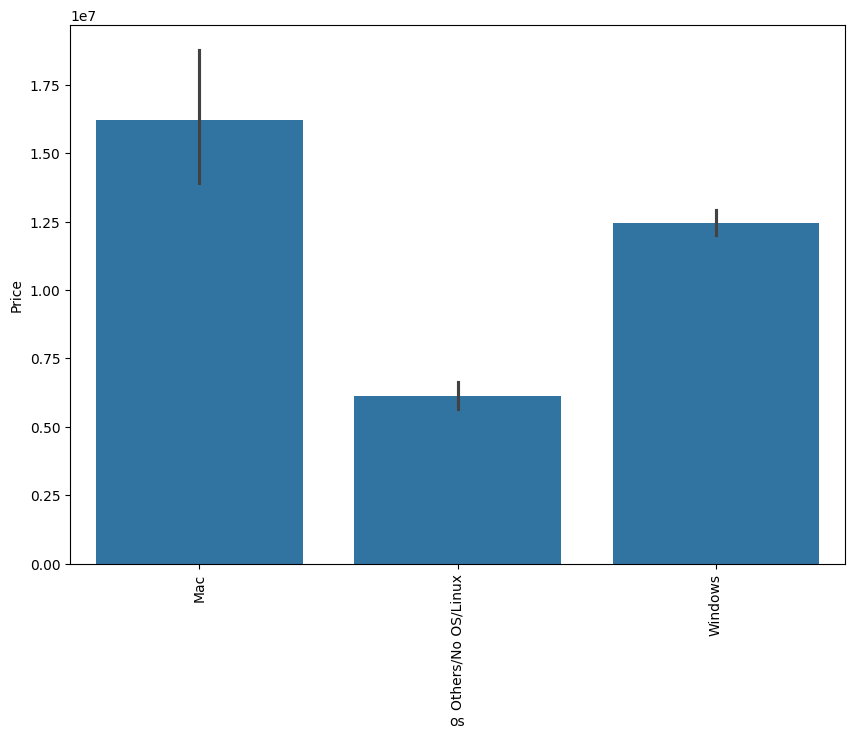

In [63]:
plt.figure(figsize=(10,7))
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Interpretation:
Laptops with Mac OS have the highest average price, followed by Windows, and then Others/No OS/Linux. The price difference is notable, with Mac laptops averaging significantly higher than the rest. The error bars, which likely represent the standard error, suggest that the variation in Mac prices is relatively large, indicating a wide range of models and price points. In contrast, laptops with Linux, no OS, or other systems have the lowest average price and smaller error bars, reflecting a more consistent and budget-oriented market segment. Windows laptops fall in between, balancing affordability with a broader feature range. This pattern aligns with industry trends where Macs are positioned as premium devices, Windows as mainstream, and Linux/no OS laptops as more affordable options, often chosen for customization or enterprise use.

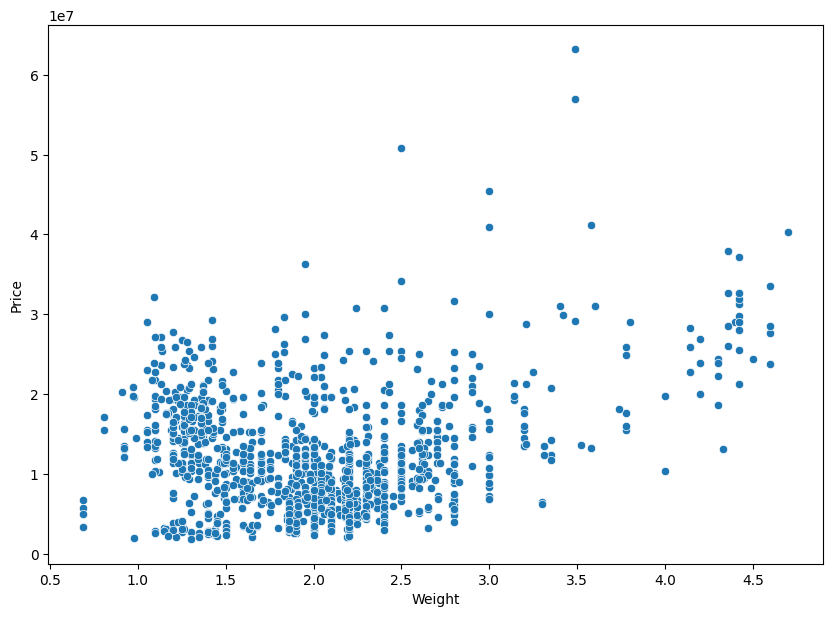

In [64]:
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['Weight'],y = df['Price'])
plt.show()

No strong linear correlation:

The scatter is widely spread, indicating that weight alone is not a strong predictor of price. Heavier laptops don't necessarily cost more or less.

Most data is clustered:

The majority of laptops fall between 1–2.5 kg and under 20 million IDR.

These are likely standard consumer laptops.

Some high-price outliers:

A few laptops (even with average weights) have prices above 50 million IDR—possibly premium or gaming laptops with other high-end specs.



### Check distribution

<ipython-input-65-ce0aba9b3507>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


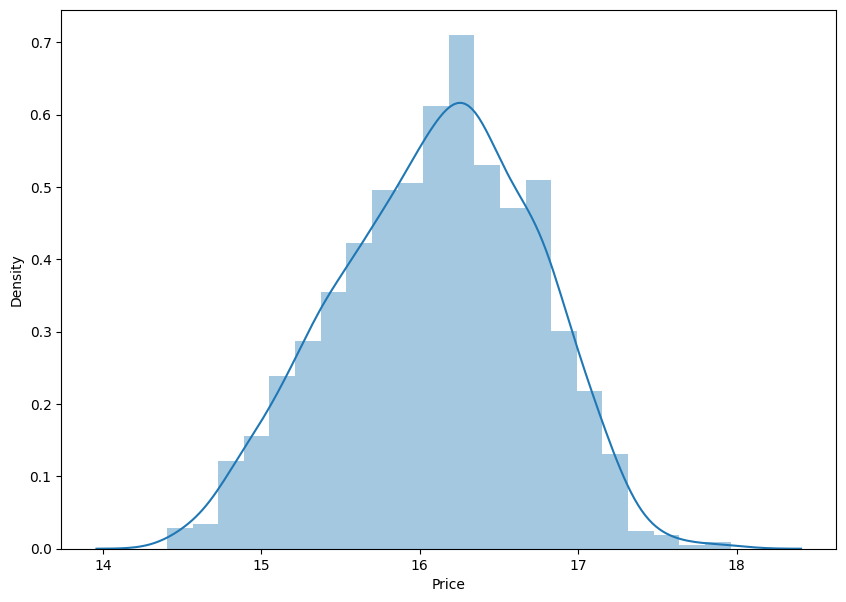

In [65]:
plt.figure(figsize=(10,7))
sns.distplot(np.log(df['Price']))
plt.show()

Nearly Normal Distribution:

The distribution now looks symmetric and bell-shaped, which closely resembles a normal (Gaussian) distribution.

This suggests that taking the log of Price successfully handled the original right-skew.


# Starting predict the model

In [66]:
df1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,"13,883,153.88"
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,"9,315,679.26"
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,"5,958,702.00"
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,"26,295,492.85"
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,"18,690,634.66"
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,"6,611,568.48"
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,"15,534,077.04"
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,"2,373,117.84"
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,"7,917,301.44"


In [67]:
df1=df1.drop('Unnamed: 0', axis = 'columns')

In [68]:
df1=df1.drop_duplicates()

In [69]:
from sklearn.preprocessing import OneHotEncoder


# Bersihkan nilai numerik
if df1["Ram"].dtype == object:
    df1["Ram"] = df1["Ram"].str.replace("GB", "").astype(int)

if df1["Weight"].dtype == object:
    df1["Weight"] = df1["Weight"].str.replace("kg", "").astype(float)

if df1["Price_IDR"].dtype == object:
    df1["Price_IDR"] = df1["Price_IDR"].str.replace(",", "").astype(float)

# Fitur dan target
x = df1[["Company", "TypeName", "Inches", "ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys", "Weight"]]
y = df1["Price_IDR"]

# Pisahkan kolom kategorikal dan numerik
cat_cols = ["Company", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu", "OpSys"]
num_cols = ["Inches", "Ram", "Weight"]

# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat_encoded = encoder.fit_transform(x[cat_cols])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
# Gabungkan dengan fitur numerik
X_encoded = np.concatenate([X_cat_encoded, x[num_cols].values], axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.15,random_state=1)

## I used The RandomForestRegressor model 

The RandomForestRegressor model can predict laptop prices due to its strong performance, robustness, and flexibility when working with complex datasets.

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [73]:
model = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('r2score:',r2_score(y_test,y_pred))
print('Mae:',mean_absolute_error(y_test,y_pred))

r2score: 0.8223650780456322
Mae: 1874042.0779082887


In [78]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=150,
                              random_state=2,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.822952837324525
MAE 1887868.9528695159


In [81]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

### To search the best parameter

In [82]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': [50,100,120,130,140,150,160,170], 
    'max_samples': [0.1,0.3,0.4,0.5,0.7,1.0],
    'max_features' : [0.5,0.6,0.7,0.8,1],
    'max_depth' : [10,15,20,30,40,50],
    'max_samples': [0.3,0.5,0.6,0.7,0.8]
    }

search = RandomizedSearchCV(model,parameters, cv=5, n_jobs = -1,verbose= 3)

search.fit(x_train,y_train)

print('Best Score', search.best_score_)
print('Best Parameter', search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score 0.8161555907786703
Best Parameter {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.5, 'max_depth': 30}


In [83]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50,100,120,150,170], 
    'max_samples': [0.1,0.3,0.4,0.5,0.7,1.0],
    'max_features' : [0.5,0.6,0.7,0.8,1],
    'max_depth' : [10,15,20,30,40,50],
    'max_samples': [0.3,0.5,0.6,0.7,0.8]
    }

search=GridSearchCV(model,parameters, cv=5, n_jobs = -1,verbose= 2)

search.fit(x_train,y_train)

print('Best Score', search.best_score_)
print('Best Parameter', search.best_params_)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Best Score 0.8180043821934021
Best Parameter {'max_depth': 20, 'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 50}


In [84]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(model, x_train, y_train,cv=10,n_jobs=-1)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.82774551 0.79447297 0.88923707 0.8611034  0.88905075 0.72391132
 0.84988636 0.77136556 0.82339437 0.71934038]
Avg : 0.8149507682427266


### Used the parameter which got before

In [85]:
model = RandomForestRegressor(n_estimators=160,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.6,
                              max_depth=40)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('r2score:',r2_score(y_test,y_pred))
print('Mae:',mean_absolute_error(y_test,y_pred))

r2score: 0.8192658487627269
Mae: 1886851.5473143866


### Trying predict as specific requested

In [86]:
import pandas as pd

df_laptop_baru = pd.DataFrame([{
    'Company': 'Dell',
    'TypeName': 'Notebook',
    'Inches': 17.3,
    'ScreenResolution': '1920x1080',
    'Cpu': 'Intel Core i7 8550U',
    'Ram': 16,
    'Memory': '512GB SSD',
    'Gpu': 'AMD Radeon 530',
    'OpSys': 'Linux Mint',
    'Weight': 2.0
}])


In [87]:
# Jika RAM dan Weight masih bertipe object, bersihkan
if df_laptop_baru["Ram"].dtype == object:
    df_laptop_baru["Ram"] = df_laptop_baru["Ram"].str.replace("GB", "").astype(int)

if df_laptop_baru["Weight"].dtype == object:
    df_laptop_baru["Weight"] = df_laptop_baru["Weight"].str.replace("kg", "").astype(float)


In [88]:
X_cat_baru = encoder.transform(df_laptop_baru[cat_cols])  # Jangan fit ulang!
X_num_baru = df_laptop_baru[num_cols].values

# Gabungkan
X_baru_encoded = np.concatenate([X_cat_baru, X_num_baru], axis=1)


### The results

In [89]:
y_pred = model.predict(X_baru_encoded)  # model = model yang sudah kamu latih
print("The prediction: Rp", int(y_pred[0]))


The prediction: Rp 16242184
